<a href="https://colab.research.google.com/github/hyhnuka/P1/blob/main/tugas01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Selalu awali dengan import-import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load data
df = pd.read_csv('test.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [48]:
# Hapus baris indeks 10 sampai 20
df_new = df.drop(df.index[1001:2627])

print(df_new)

df_new.info()



          ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0     458989  Female          Yes   36       Yes    Engineer              0.0   
1     458994    Male          Yes   37       Yes  Healthcare              8.0   
2     458996  Female          Yes   69        No         NaN              0.0   
3     459000    Male          Yes   59        No   Executive             11.0   
4     459001  Female           No   19        No   Marketing              NaN   
...      ...     ...          ...  ...       ...         ...              ...   
996   462304    Male          Yes   56       Yes      Artist              1.0   
997   462306    Male          Yes   83        No      Lawyer              8.0   
998   462309    Male           No   32       Yes  Healthcare              NaN   
999   462310    Male          Yes   63       Yes      Artist              5.0   
1000  462323  Female          Yes   71       Yes      Doctor              1.0   

     Spending_Score  Family

In [53]:
df_clean = df_new.dropna()

print(df_clean.isna().sum())  # Mengecek NaN setelah pembersihan

print("Data duplicated:", df_clean.duplicated().sum())  # Mengecek duplikasi setelah pembersihan


ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64
Data duplicated: 0


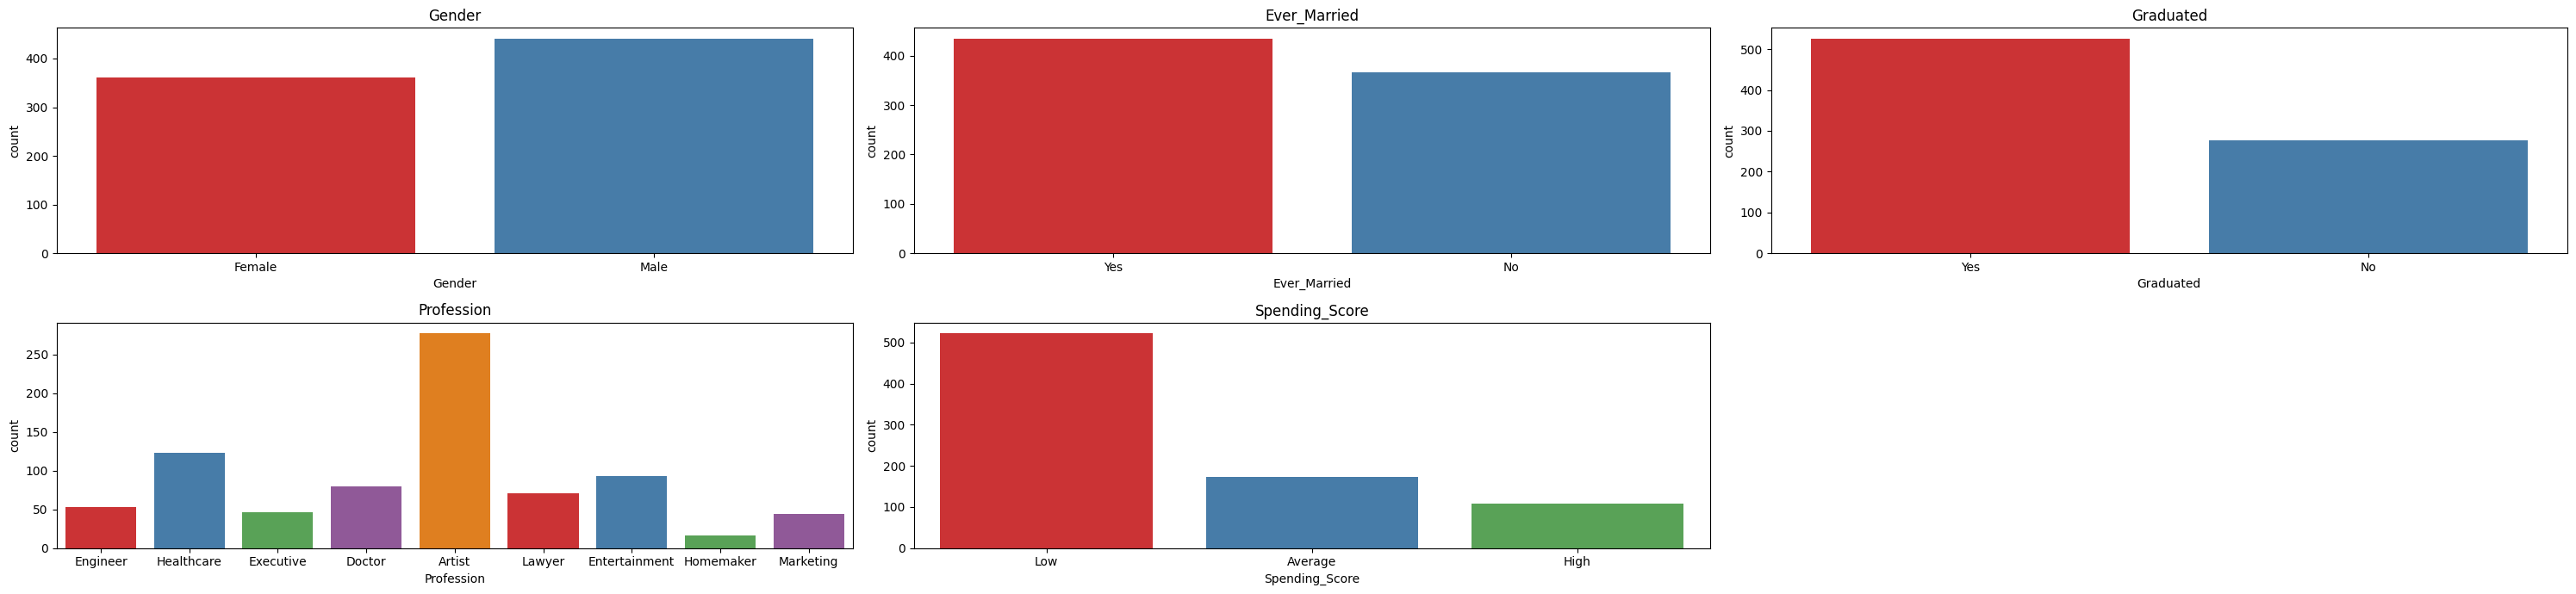

In [54]:
# Kita coba visualisasi data pada kolom 'rarity', 'region', 'vision', 'weapon_type'

kolom_1 = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']


color_palette = sns.color_palette("Set1", len(kolom_1))

plt.figure(figsize=(30, 7))
for i, column in enumerate(kolom_1, 1):
    plt.subplot((len(kolom_1)//3)+1, 3, i)
    sns.countplot(data=df_clean, x=column, palette=color_palette)
    plt.title(column)

plt.tight_layout()
plt.show()

In [66]:
print("Gender:", df_clean['Gender'].unique())
print("Ever Married:", df_clean['Ever_Married'].unique())
print("Graduated:", df_clean['Graduated'].unique())
print("Profession:", df_clean['Profession'].unique())


Gender: ['Female' 'Male']
Ever Married: ['Yes' 'No']
Graduated: ['Yes' 'No']
Profession: ['Engineer' 'Healthcare' 'Executive' 'Doctor' 'Artist' 'Lawyer'
 'Entertainment' 'Homemaker' 'Marketing']


In [73]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Buat objek LabelEncoder
le = LabelEncoder()

cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession']  # Kolom kategori
for col in cols:
    df_clean[col] = le.fit_transform(df_clean[col])  # Label Encoding untuk tiap kolom

print(df_clean.info())  # Cek apakah encoding berhasil
print(df_clean)  # Menampilkan seluruh baris dalam dataset



<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               802 non-null    int64  
 1   Gender           802 non-null    int64  
 2   Ever_Married     802 non-null    int64  
 3   Age              802 non-null    int64  
 4   Graduated        802 non-null    int64  
 5   Profession       802 non-null    int64  
 6   Work_Experience  802 non-null    float64
 7   Spending_Score   802 non-null    object 
 8   Family_Size      802 non-null    float64
 9   Var_1            802 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 68.9+ KB
None
          ID  Gender  Ever_Married  Age  Graduated  Profession  \
0     458989       0             1   36          1           2   
1     458994       1             1   37          1           5   
3     459000       1             1   59          0           4   
5     459003   

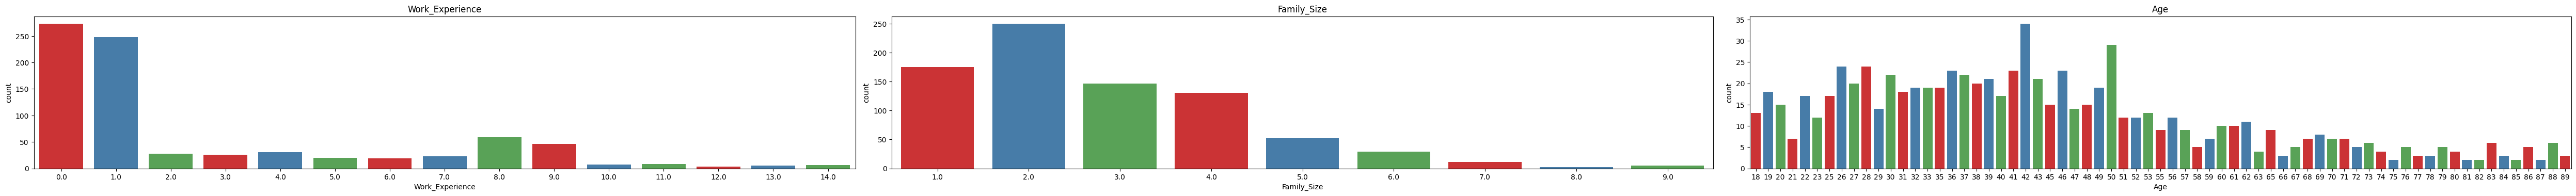

In [76]:
# Kita coba visualisasi data pada kolom 'rarity', 'region', 'vision', 'weapon_type'

kolom_1 = ['Work_Experience', 'Family_Size', 'Age']


color_palette = sns.color_palette("Set1", len(kolom_1))

plt.figure(figsize=(50, 7))
for i, column in enumerate(kolom_1, 1):
    plt.subplot((len(kolom_1)//3)+1, 3, i)
    sns.countplot(data=df_clean, x=column, palette=color_palette)
    plt.title(column)

plt.tight_layout()
plt.show()

<Figure size 2000x1000 with 0 Axes>

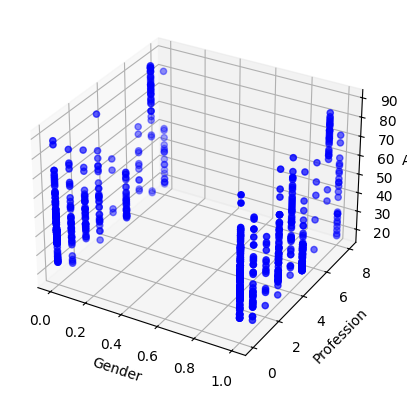

In [77]:
# Kita coba visualisasi secara 3d antara HP, ATK, dan DEF

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize = (20, 10))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df_clean['Gender']
y = df_clean['Profession']
z = df_clean['Age']


ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('Gender')
ax.set_ylabel('Profession')
ax.set_zlabel('Age')


plt.ion()
plt.show()